## Preprocessing

### Load Data

In [76]:
import pandas as pd

species = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_DT(1).txt", sep = "\t")

In [2]:
species

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778
1,16,Potentilla elegans,Potentilla elegans,25.0,CoverPerc,0.694444
2,16,Saxifraga serpyllifolia,Saxifraga serpyllifolia,1.0,CoverPerc,0.027778
3,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462
4,17,Potentilla elegans,Potentilla elegans,25.0,CoverPerc,0.961538
...,...,...,...,...,...,...
1945379,1126790,Potentilla erecta,Potentilla erecta,0.3,CoverPerc,0.006276
1945380,1126790,Salix lapponum,Salix lapponum,1.0,CoverPerc,0.020921
1945381,1126790,Stellaria palustris,Stellaria palustris,0.5,CoverPerc,0.010460
1945382,1126790,Trichophorum alpinum,Scirpus hudsonianus,18.0,CoverPerc,0.376569


Check to see if sum of relative abundance == 1 for each plot --> TRUE

In [3]:
check_abun = species.groupby(['PlotObservationID'], as_index=False).sum()

/tmp/ipykernel_1651550/1183992891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  check_abun = species.groupby(['PlotObservationID'], as_index=False).sum()


In [4]:
check_abun

,PlotObservationID,Original_abundance,Relative_cover
0,16,36.0,1.0
1,17,26.0,1.0
2,18,42.0,1.0
3,20,12.0,1.0
4,22,19.5,1.0
...,...,...,...
95099,1126749,10.5,1.0
95100,1126761,95.0,1.0
95101,1126769,99.5,1.0
95102,1126774,39.0,1.0


Most relative covers add up to 1, but there are some inconsistencies in the data.

In [6]:
max(check_abun['Relative_cover'])

1.6346443154953785

In [7]:
min(check_abun['Relative_cover'])

0.7954545454545439

### Link to TRY

See "1_FuncDiv_Measures" for TRY preprocessing.

In [77]:
TRY = pd.read_csv("/net/scratch/swolf/TRY_5_gapfilled/TRY_50_2020_01/gapfilled_data/species_means.csv")

In [78]:
TRY.head()

,Species,X1080,X11,X13,X138,X14,X144,X145,X146,X15,...,X3114,X3120,X4,X46,X47,X50,X55,X6,X78,X95
0,Aaronsohnia pubescens,4687.727659,16.718827,437.285876,397.700967,19.528472,44.752410,0.885511,31.782871,1.593238,...,392.094266,5.076392,0.486141,0.279432,0.228487,1.316797,25.602265,0.599528,0.127767,90.961137
1,Abacaba (palm),1540.977178,13.752224,474.569278,101.144897,25.325213,42.438202,1.722516,19.759657,1.253182,...,1292.580095,2.645555,0.671823,0.193238,0.357516,1.920918,126.367834,2.188646,2.600829,88.772969
2,Abarema adenophora,918.104083,11.292982,525.642849,8720.885563,24.622563,32.880758,2.896877,21.159347,1.395954,...,10016.868768,1.925418,0.657763,0.233761,0.467485,2.142701,1035.659549,0.727078,4.192258,75.810130
3,Abarema adenophorum,1111.750790,14.205463,492.190726,4998.461797,29.024637,19.225122,1.607744,17.181488,1.046841,...,3127.058669,2.313586,0.373883,0.223141,0.429835,1.926335,312.589592,0.487666,3.746875,81.965979
4,Abarema alexandri,1108.703464,13.221454,492.933836,1437.577709,27.439778,11.411715,0.989792,18.736084,0.935064,...,1450.214849,2.076229,0.561525,0.219078,0.444827,2.019783,154.049285,0.676757,3.596090,80.121546


In [115]:
sPlot_TRY_1 = species.merge(TRY.set_index("Species"), left_on="Species", right_index = True)


In [116]:
sPlot_TRY_1.shape[0]/species.shape[0]

0.796684870442031

In [117]:
sPlot_TRY_1['PlotObservationID'].nunique()

94407

In [118]:
sPlot_TRY_1['Species'].isnull().values.any()

False

In [119]:
not_merged = species[~species.index.isin(sPlot_TRY_1.index)]  # Select rows not merged from species

not_merged.drop('Species', axis=1, inplace=True)

sPlot_TRY_2 = pd.merge(not_merged, TRY, left_on= ['Original_species'],
                    right_on= ['Species'] , how='inner')  # Merge based on 'Original_species'

sPlot_TRY = pd.concat([sPlot_TRY_1, sPlot_TRY_2])  # Combine the two merged DataFrames


/tmp/ipykernel_1651550/3891577214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_merged.drop('Species', axis=1, inplace=True)


In [122]:
sPlot_TRY.shape[0]/species.shape[0]

0.7980444991837087

In [123]:
sPlot_TRY['PlotObservationID'].nunique()

94422

In [124]:
species['PlotObservationID'].nunique()

95104

In [125]:
import numpy as np 

sPlot_TRY.replace(0, np.nan, inplace=True)

In [126]:
0.0 in sPlot_TRY['Relative_cover'].unique() 

False

In [127]:
sPlot_TRY.duplicated().sum()

130

In [128]:
sPlot_TRY.drop_duplicates(keep='first', inplace=True)

In [129]:
sPlot_TRY.shape[0]/species.shape[0]

0.7979776743306206

### Add locations

In [130]:
sPlot = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_header(2).txt", sep= "\t")

/tmp/ipykernel_1651550/3013501701.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  sPlot = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_header(2).txt", sep= "\t")


In [131]:
sPlot.columns

Index(['PlotObservationID', 'GIVD_ID', 'Dataset', 'Continent', 'Country',
       'Biome', 'Date_of_recording', 'Latitude', 'Longitude',
       'Location_uncertainty', 'Releve_area', 'Plant_recorded', 'Elevation',
       'Aspect', 'Slope', 'is_forest', 'ESY', 'Naturalness', 'Forest',
       'Shrubland', 'Grassland', 'Wetland', 'Sparse_vegetation', 'Cover_total',
       'Cover_tree_layer', 'Cover_shrub_layer', 'Cover_herb_layer',
       'Cover_moss_layer', 'Cover_lichen_layer', 'Cover_algae_layer',
       'Cover_litter_layer', 'Cover_bare_rocks', 'Cover_cryptogams',
       'Cover_bare_soil', 'Height_trees_highest', 'Height_trees_lowest',
       'Height_shrubs_highest', 'Height_shrubs_lowest', 'Height_herbs_average',
       'Height_herbs_lowest', 'Height_herbs_highest', 'SoilClim_PC1',
       'SoilClim_PC2', 'Resample_1', 'Resample_2', 'Resample_3',
       'Resample_1_consensus'],
      dtype='object')

'Releve_area' is the area of the sampling plot in m2.

In [132]:
loc = sPlot[['PlotObservationID', 'Releve_area', 'Latitude', 'Longitude']]

In [133]:
loc

,PlotObservationID,Releve_area,Latitude,Longitude
0,16,NaN,62.420000,-154.180000
1,17,NaN,62.420000,-154.180000
2,18,NaN,62.420000,-154.180000
3,20,NaN,62.420000,-154.180000
4,22,NaN,62.420000,-154.180000
...,...,...,...,...
95099,1126749,4.0,56.287870,27.273862
95100,1126761,4.0,56.939965,23.598014
95101,1126769,4.0,56.939965,23.598014
95102,1126774,4.0,57.248222,22.147667


In [134]:
sPlot_TRY = pd.merge(sPlot_TRY, loc, 
                    left_on= ['PlotObservationID'],
                    right_on= ['PlotObservationID'], 
                    how='inner')
sPlot_TRY

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,X1080,X11,X13,X138,...,X46,X47,X50,X55,X6,X78,X95,Releve_area,Latitude,Longitude
0,16,Festuca brachyphylla,Festuca brachyphylla,10.00,CoverPerc,0.277778,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000
1,17,Festuca brachyphylla,Festuca brachyphylla,1.00,CoverPerc,0.038462,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000
2,18,Festuca brachyphylla,Festuca brachyphylla,2.00,CoverPerc,0.047619,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000
3,713,Festuca brachyphylla,Festuca brachyphylla,2.00,CoverPerc,0.011173,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,100.0,69.851405,-156.016865
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.00,CoverPerc,0.044693,991.623552,6.427231,523.751537,41.326091,...,0.366573,0.327732,2.124601,1.717482,0.040477,-5.866897,74.753748,100.0,69.851405,-156.016865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552368,49037,Anthocarapa nitidula,Anthocarapa nitidula,1.07,x_BA,0.012664,651.108657,10.930220,468.337308,44.123623,...,0.186579,0.395591,1.979995,569.312680,2.935290,2.866523,88.118130,400.0,-21.590530,165.963690
1552369,49042,Anthocarapa nitidula,Anthocarapa nitidula,7.03,x_BA,0.136850,651.108657,10.930220,468.337308,44.123623,...,0.186579,0.395591,1.979995,569.312680,2.935290,2.866523,88.118130,400.0,-20.833690,165.145330
1552370,49043,Anthocarapa nitidula,Anthocarapa nitidula,0.36,x_BA,0.006860,651.108657,10.930220,468.337308,44.123623,...,0.186579,0.395591,1.979995,569.312680,2.935290,2.866523,88.118130,400.0,-20.833390,165.145220
1552371,49079,Anthocarapa nitidula,Anthocarapa nitidula,0.17,x_BA,0.002497,651.108657,10.930220,468.337308,44.123623,...,0.186579,0.395591,1.979995,569.312680,2.935290,2.866523,88.118130,400.0,-20.822690,165.137670


In [135]:
# save intermediate result
sPlot_TRY.to_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_TRYgapfilled.csv", index=False)


## Calculate community weighted mean for gap-filled TRY traits

In [194]:
sPlot_TRY = pd.read_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_TRYgapfilled.csv")

In [195]:
sPlot_TRY.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,X1080,X11,X13,X138,...,X46,X47,X50,X55,X6,X78,X95,Releve_area,Latitude,Longitude
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,5323.593548,13.288268,459.744335,167.314329,...,0.220397,0.342990,1.248377,3.907219,0.203998,-2.160506,94.683061,100.0,69.851405,-156.016865
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,991.623552,6.427231,523.751537,41.326091,...,0.366573,0.327732,2.124601,1.717482,0.040477,-5.866897,74.753748,100.0,69.851405,-156.016865


Check which traits should be ln-transformed:

In [196]:
columns_to_check =sPlot_TRY.columns[6:-3] 
columns_with_negative_values = []

for column in columns_to_check:
    if (sPlot_TRY[column] < 0).any():
        columns_with_negative_values.append(column)

if len(columns_with_negative_values) > 0:
    print("The following columns have negative values:", columns_with_negative_values)
else:
    print("None of the columns have negative values.")

The following columns have negative values: ['X4', 'X47', 'X78', 'X95']


In [197]:
import scipy.stats as stats

columns_to_analyze = sPlot_TRY.columns[6:-3] 

for column in columns_to_analyze:
    _, p_value = stats.shapiro(sPlot_TRY[column])
    alpha = 0.05  # Significance level

    if p_value > alpha:
        print(f"{column} has a normal distribution (p-value: {p_value})")
    else:
        print(f"{column} does not have a normal distribution (p-value: {p_value})")

X1080 does not have a normal distribution (p-value: 0.0)


/net/home/swolf/.conda/envs/traitmaps/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


X11 does not have a normal distribution (p-value: 0.0)
X13 does not have a normal distribution (p-value: 0.0)
X138 does not have a normal distribution (p-value: 0.0)
X14 does not have a normal distribution (p-value: 0.0)
X144 does not have a normal distribution (p-value: 0.0)
X145 does not have a normal distribution (p-value: 0.0)
X146 does not have a normal distribution (p-value: 0.0)
X15 does not have a normal distribution (p-value: 0.0)
X163 does not have a normal distribution (p-value: 0.0)
X169 does not have a normal distribution (p-value: 0.0)
X18 does not have a normal distribution (p-value: 0.0)
X21 does not have a normal distribution (p-value: 0.0)
X223 does not have a normal distribution (p-value: 0.0)
X224 does not have a normal distribution (p-value: 0.0)
X237 does not have a normal distribution (p-value: 0.0)
X26 does not have a normal distribution (p-value: 0.0)
X27 does not have a normal distribution (p-value: 0.0)
X281 does not have a normal distribution (p-value: 0.0)


Plot distributions of traits

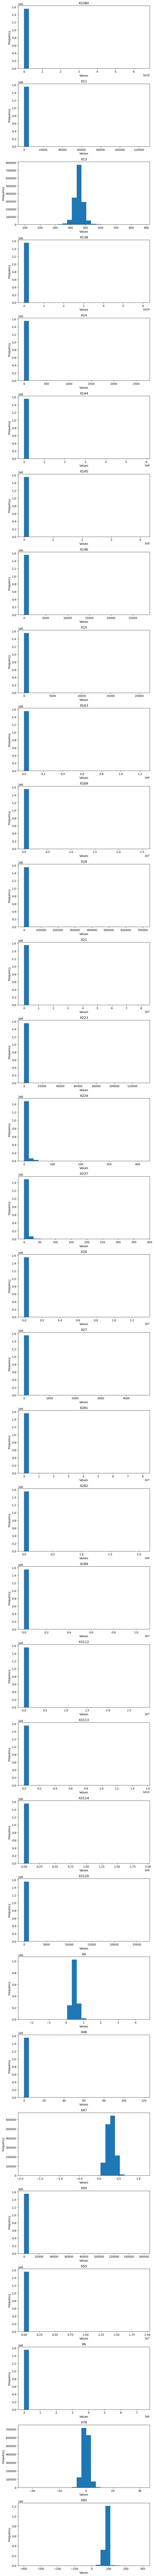

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = sPlot_TRY.columns[6:-3]  # Select columns 2-8 (0-based indexing)
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    sPlot_TRY[column].plot(kind='hist', ax=ax, bins=25)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [199]:
import numpy as np

# select columns without negative values:
columns_to_transform = sPlot_TRY.columns[6:-3]  # Select columns
columns_to_transform = columns_to_transform.drop(['X4', 'X47', 'X78', 'X95'])

In [200]:
sPlot_TRY[columns_to_transform] = sPlot_TRY[columns_to_transform].apply(np.log)

Run again for ln-transformed values:

In [202]:
import scipy.stats as stats

columns_to_analyze = sPlot_TRY.columns[6:-3] 

for column in columns_to_analyze:
    _, p_value = stats.shapiro(sPlot_TRY[column])
    alpha = 0.05  # Significance level

    if p_value > alpha:
        print(f"{column} has a normal distribution (p-value: {p_value})")
    else:
        print(f"{column} does not have a normal distribution (p-value: {p_value})")

X1080 does not have a normal distribution (p-value: 0.0)
X11 does not have a normal distribution (p-value: 0.0)
X13 does not have a normal distribution (p-value: 0.0)
X138 does not have a normal distribution (p-value: 0.0)
X14 does not have a normal distribution (p-value: 0.0)
X144 does not have a normal distribution (p-value: 0.0)
X145 does not have a normal distribution (p-value: 0.0)
X146 does not have a normal distribution (p-value: 0.0)
X15 does not have a normal distribution (p-value: 0.0)
X163 does not have a normal distribution (p-value: 0.0)
X169 does not have a normal distribution (p-value: 0.0)
X18 does not have a normal distribution (p-value: 0.0)
X21 does not have a normal distribution (p-value: 0.0)
X223 does not have a normal distribution (p-value: 0.0)
X224 does not have a normal distribution (p-value: 0.0)
X237 does not have a normal distribution (p-value: 0.0)
X26 does not have a normal distribution (p-value: 0.0)
X27 does not have a normal distribution (p-value: 0.0)

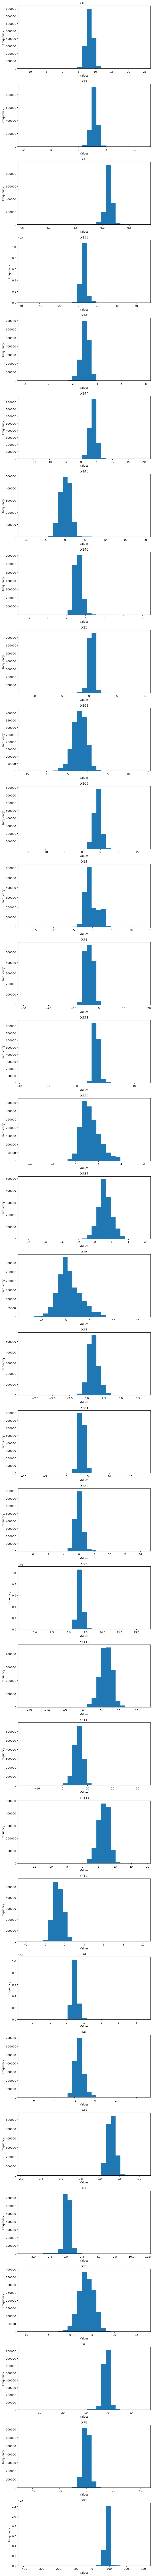

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
columns_to_plot = sPlot_TRY.columns[6:-3]  # Select columns 2-8 (0-based indexing)
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    sPlot_TRY[column].plot(kind='hist', ax=ax, bins=25)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [205]:
# Group the dataframe by the plot number
grouped_sPlot_TRY = sPlot_TRY.groupby('PlotObservationID')

results = []

# Iterate over each plot
for plot, group in grouped_sPlot_TRY:
    traits = group.drop(['PlotObservationID', 'Species', 'Original_species', 
                         'Original_abundance', 'Abundance_scale', 'Relative_cover', 
                        'Releve_area', 'Latitude', 'Longitude'], axis=1)  # Drop 'plot' and 'cover' columns
    covers = group['Relative_cover']
    
    # Calculate the weighted mean of each trait
    # We divide by convers.sum() since the relative covers in each plot are not always exactly 1.
    weighted_means = traits.mul(covers, axis=0).sum() / covers.sum()
    
    # Store the results as a dictionary
    result = {'PlotObservationID': plot}
    result.update(weighted_means)
    results.append(result)

# Create a new dataframe from the results
sPlot_cwm = pd.DataFrame(results)


In [206]:
# Add location

sPlot_cwm = pd.merge(sPlot_cwm, loc, 
                    left_on= ['PlotObservationID'],
                    right_on= ['PlotObservationID'], 
                    how='inner')


In [207]:
sPlot_cwm

,PlotObservationID,X1080,X11,X13,X138,X14,X144,X145,X146,X15,...,X46,X47,X50,X55,X6,X78,X95,Releve_area,Latitude,Longitude
0,16,8.579904,2.586882,6.130671,5.119874,2.824851,3.773571,-1.957130,3.303937,1.104837,...,-1.512323,0.342990,0.221844,1.362826,-1.589643,-2.160506,94.683061,NaN,62.420000,-154.180000
1,17,8.579904,2.586882,6.130671,5.119874,2.824851,3.773571,-1.957130,3.303937,1.104837,...,-1.512323,0.342990,0.221844,1.362826,-1.589643,-2.160506,94.683061,NaN,62.420000,-154.180000
2,18,8.579904,2.586882,6.130671,5.119874,2.824851,3.773571,-1.957130,3.303937,1.104837,...,-1.512323,0.342990,0.221844,1.362826,-1.589643,-2.160506,94.683061,NaN,62.420000,-154.180000
3,20,9.005351,2.715084,6.126062,3.093855,2.970858,2.191212,-2.264206,3.195919,0.620451,...,-1.589459,0.299290,0.331934,1.720117,-0.657510,-3.232422,90.010427,NaN,62.420000,-154.180000
4,22,8.862103,2.732444,6.124313,3.447549,3.008729,2.286074,-1.993211,3.162741,0.624886,...,-1.558314,0.287622,0.350390,1.844761,-0.771388,-3.195510,89.458775,NaN,62.420000,-154.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94417,1126749,9.365248,2.072262,6.127231,4.731893,2.856481,2.656889,-1.781892,3.312023,0.382507,...,-0.881532,0.349959,0.801770,2.955130,-0.973462,1.501864,84.085166,4.0,56.287870,27.273862
94418,1126761,8.808422,2.728722,6.117931,4.331189,2.847216,3.180251,-0.365904,3.307315,0.226747,...,-1.880082,0.299131,0.204325,3.756735,-0.808671,-0.582977,88.840196,4.0,56.939965,23.598014
94419,1126769,8.746474,2.724598,6.116096,4.418184,2.860048,3.169744,-0.359163,3.299496,0.232689,...,-1.882405,0.303104,0.222321,3.783463,-0.680548,-0.620517,89.151072,4.0,56.939965,23.598014
94420,1126774,8.842612,2.676608,6.118661,4.846300,2.988361,3.485798,-0.428630,3.175206,0.291050,...,-1.346243,0.306486,0.376391,2.929173,-1.357155,0.563605,84.740036,4.0,57.248222,22.147667


In [208]:
sPlot_cwm.to_csv("/net/home/swolf/iNaturalist/Data/sPlotOpen/sPlotOpen_TRYgapfilled_cwm.csv", index=False)


## Aggregate without weighting by plot size

In [34]:
import numpy as np

def group_grid_data(df, long, lat, deg):
    
    # create new dataframe to save the results for each grid cell
    grouped_df = pd.DataFrame()
    
    # convert degree into step size
    step = int((360/deg) + 1)
    
    bins_x = np.linspace(-180,180,step) 
    bins_y= np.linspace(-90,90,int(((step - 1)/2)+1))
    
    # group latitude and longitude coordinates into bins
    # create new columns 'x_bin' and 'y_bin'
    df['x_bin'] = pd.cut(df[long], bins=bins_x)
    df['y_bin'] = pd.cut(df[lat], bins=bins_y)
    
    # raster coordinates are in center of raster cell
    df['x_bin'] = df['x_bin'].apply(lambda x: ((x.left + x.right) /2) )
    df['y_bin'] = df['y_bin'].apply(lambda x: ((x.left + x.right) /2) )
    
    #df['Coords'] = list(zip(df.y_bin, df.x_bin))
    # add to grouped_data dataframe
    #grouped_df = df.drop_duplicates(subset=['x_bin', 'y_bin'], keep='last')
    
    df_groups = df.groupby(['x_bin', 'y_bin'])
    
    return df

In [35]:
df_groups = group_grid_data(sPlot_TRY, 'Longitude', 'Latitude', deg=2.0)

In [25]:
#sPlot_TRY['grid_lat'] = sPlot_TRY['Latitude'].apply(lambda x: round(x / 2) * 2)

In [26]:
#sPlot_TRY['grid_lon'] = sPlot_TRY['Longitude'].apply(lambda y: round(y / 2) * 2)

In [36]:
sPlot_TRY['grid_cell'] = sPlot_TRY['x_bin'].astype(str) + '_' + sPlot_TRY['y_bin'].astype(str)

In [ ]:
sPlot_TRY.head()

,PlotObservationID,Species,Original_species,Original_abundance,Abundance_scale,Relative_cover,X1080,X11,X13,X138,...,X6,X78,X95,Releve_area,Latitude,Longitude,x_bin,y_bin,Coords,grid_cell
0,16,Festuca brachyphylla,Festuca brachyphylla,10.0,CoverPerc,0.277778,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000,-155.0,63.0,"(63.0, -155.0)",-155.0_63.0
1,17,Festuca brachyphylla,Festuca brachyphylla,1.0,CoverPerc,0.038462,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000,-155.0,63.0,"(63.0, -155.0)",-155.0_63.0
2,18,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.047619,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,NaN,62.420000,-154.180000,-155.0,63.0,"(63.0, -155.0)",-155.0_63.0
3,713,Festuca brachyphylla,Festuca brachyphylla,2.0,CoverPerc,0.011173,5323.593548,13.288268,459.744335,167.314329,...,0.203998,-2.160506,94.683061,100.0,69.851405,-156.016865,-157.0,69.0,"(69.0, -157.0)",-157.0_69.0
4,713,Cassiope tetragona,Cassiope tetragona [s. tetragona],8.0,CoverPerc,0.044693,991.623552,6.427231,523.751537,41.326091,...,0.040477,-5.866897,74.753748,100.0,69.851405,-156.016865,-157.0,69.0,"(69.0, -157.0)",-157.0_69.0


Group the DataFrame by grid cell and species, and calculate the sum of the relative cover for each species within each grid cell


In [38]:
grouped_df = sPlot_TRY.groupby(['grid_cell', 'Species'])['Relative_cover'].sum().reset_index()

In [39]:
grouped_df.head()

,grid_cell,Species,Relative_cover
0,-1.0_11.0,Acacia sieberiana,0.018868
1,-1.0_11.0,Achyranthes aspera,0.018868
2,-1.0_11.0,Acroceras amplectens,0.018868
3,-1.0_11.0,Alternanthera sessilis,0.018868
4,-1.0_11.0,Andropogon gayanus,0.018868


Calculate the total relative cover of all species within each grid cell

In [41]:
total_relative_cover = grouped_df.groupby('grid_cell')['Relative_cover'].sum().reset_index()

In [42]:
total_relative_cover.head()

,grid_cell,Relative_cover
0,-1.0_11.0,0.886792
1,-1.0_13.0,78.184092
2,-1.0_15.0,519.202654
3,-1.0_39.0,44.768528
4,-1.0_41.0,152.669531


In [43]:
# Merge the total_relative_cover back into the grouped_df
grouped_df = pd.merge(grouped_df, total_relative_cover, on='grid_cell', suffixes=('', '_total'))

In [44]:
grouped_df.head()

,grid_cell,Species,Relative_cover,Relative_cover_total
0,-1.0_11.0,Acacia sieberiana,0.018868,0.886792
1,-1.0_11.0,Achyranthes aspera,0.018868,0.886792
2,-1.0_11.0,Acroceras amplectens,0.018868,0.886792
3,-1.0_11.0,Alternanthera sessilis,0.018868,0.886792
4,-1.0_11.0,Andropogon gayanus,0.018868,0.886792


In [45]:
# Calculate the new relative cover for each species within each grid cell
grouped_df['Relative_cover_agg'] = grouped_df['Relative_cover'] / grouped_df['Relative_cover_total']

# Drop unnecessary columns
grouped_df = grouped_df.drop(['Relative_cover', 'Relative_cover_total'], axis=1)


In [46]:
grouped_df.head()

,grid_cell,Species,Relative_cover_agg
0,-1.0_11.0,Acacia sieberiana,0.021277
1,-1.0_11.0,Achyranthes aspera,0.021277
2,-1.0_11.0,Acroceras amplectens,0.021277
3,-1.0_11.0,Alternanthera sessilis,0.021277
4,-1.0_11.0,Andropogon gayanus,0.021277
